Martin Yap, Hoyun Yoon ICP 9

In [1]:
# Import the necessary libraries
from tensorflow.keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the training and testing labels and images from the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Preprocess the training and testing data so that the model can read the information

In [3]:
# Preprocess the data by converting each image into a single feature
dimData = np.prod(train_images.shape[1:])

# Form the testing and training data for the model
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [4]:
# Convert the data to float
train_data.astype('float')
test_data.astype('float')

# Scale the values between 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

In [5]:
# Change labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Create model and fitting the data

In [6]:
# Initialize the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the data
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 15s 56ms/step - loss: 0.2709 - accuracy: 0.9156 - val_loss: 0.1290 - val_accuracy: 0.9611
Epoch 2/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.0895 - val_accuracy: 0.9738
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.1007 - val_accuracy: 0.9684
Epoch 4/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0777 - val_accuracy: 0.9768
Epoch 5/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0800 - val_accuracy: 0.9779
Epoch 6/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0988 - val_accuracy: 0.9734
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.1129 - val_accuracy: 0.97

In [8]:
# Evaluate the model to find the loss and accuracy
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

print("Evaluation result on Test Data: Loss = {}, Accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9815
Evaluation result on Test Data: Loss = 0.14748309552669525, Accuracy = 0.9815000295639038


The original model had an accuracy of about 0.982 and a loss of about 0.147.

ICP 9 Tasks

1) Change number of hidden layers and the activation to tanh or elu

In [9]:
model2 = Sequential()

# Using the tanh activation
model2.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model2.add(Dense(512, activation='tanh'))

# Add new hidden layers
model2.add(Dense(25, activation='tanh'))
model2.add(Dense(15, activation='tanh'))
model2.add(Dense(20, activation='tanh'))

model2.add(Dense(10, activation='softmax'))

In [10]:
# Compile the model
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the data
history2 = model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 8s 29ms/step - loss: 0.6380 - accuracy: 0.8624 - val_loss: 0.4901 - val_accuracy: 0.8646
Epoch 2/20
235/235 [==============================] - 7s 28ms/step - loss: 0.2202 - accuracy: 0.9423 - val_loss: 0.2177 - val_accuracy: 0.9382
Epoch 3/20
235/235 [==============================] - 7s 28ms/step - loss: 0.1455 - accuracy: 0.9600 - val_loss: 0.1714 - val_accuracy: 0.9519
Epoch 4/20
235/235 [==============================] - 7s 28ms/step - loss: 0.1094 - accuracy: 0.9694 - val_loss: 0.1320 - val_accuracy: 0.9620
Epoch 5/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0849 - accuracy: 0.9766 - val_loss: 0.1680 - val_accuracy: 0.9498
Epoch 6/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0672 - accuracy: 0.9806 - val_loss: 0.1676 - val_accuracy: 0.9526
Epoch 7/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0559 - accuracy: 0.9837 - val_loss: 0.1048 - val_accuracy: 0.9694

In [11]:
# Evaluate the model to find the loss and accuracy
[test_loss2, test_acc2] = model2.evaluate(test_data, test_labels_one_hot)

print("Evaluation result on Test Data: Loss = {}, Accuracy = {}".format(test_loss2, test_acc2))

313/313 [==============================] - 1s 4ms/step - loss: 0.0941 - accuracy: 0.9793
Evaluation result on Test Data: Loss = 0.09406201541423798, Accuracy = 0.9793000221252441


The new model had an accuracy of about 0.979 and a loss of about 0.0941. By changing the activation from relu to tanh and adding more dense layers, we were able to see that the model had a lower accuracy and lower loss compared to the original model. 


2) Plot the loss and accuracy for both training and testing data

In [12]:
# check key values 
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


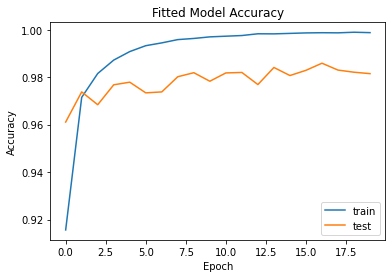

In [13]:
#Plot the accuracies of the training and testing datasets from the history object
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

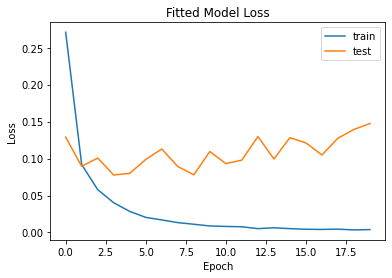

In [14]:
#Plot the losses of the training and testing datasets from the history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

Looking at the graphs for accuracy and loss for the history object, we can see that the training and testing lines follow similar waveforms in the accuracy graph, but differ in the loss graph. With the training data, the accuracy increases and then plateaus when approaching 1.0 while the loss decreases and plateaus when approaching 0.0. The training data also produced smooth curves and show distinct plateaus as epoch increases. The testing data does show similar behaviors in the beginning for both accuracy and loss; however after a certain point, the testing data is a bit more scattered and does not form a smooth plateau like the training data does. 

3) Run the same code without scaling the images

In [15]:
# Get nonscaled training and testing datasets
train_data2 = train_images.reshape(train_images.shape[0], dimData)
test_data2 = test_images.reshape(test_images.shape[0], dimData)

In [16]:
# Initialize the model
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(dimData,)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [17]:
# Compile the model
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the data
history3 = model3.fit(train_data2, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data2, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 7s 28ms/step - loss: 6.4745 - accuracy: 0.8731 - val_loss: 1.0136 - val_accuracy: 0.9014
Epoch 2/20
235/235 [==============================] - 6s 27ms/step - loss: 0.4307 - accuracy: 0.9444 - val_loss: 0.3227 - val_accuracy: 0.9453
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 0.2200 - accuracy: 0.9599 - val_loss: 0.3776 - val_accuracy: 0.9430
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1684 - accuracy: 0.9674 - val_loss: 0.3040 - val_accuracy: 0.9548
Epoch 5/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1400 - accuracy: 0.9726 - val_loss: 0.2604 - val_accuracy: 0.9598
Epoch 6/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1327 - accuracy: 0.9762 - val_loss: 0.2856 - val_accuracy: 0.9602
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1403 - accuracy: 0.9780 - val_loss: 0.3107 - val_accuracy: 0.9619

In [18]:
# Evaluate the model to find the loss and accuracy
[test_loss3, test_acc3] = model3.evaluate(test_data2, test_labels_one_hot)

print("Evaluation result on Test Data: Loss = {}, Accuracy = {}".format(test_loss3, test_acc3))

313/313 [==============================] - 1s 4ms/step - loss: 0.7043 - accuracy: 0.9701
Evaluation result on Test Data: Loss = 0.7043426632881165, Accuracy = 0.9700999855995178


Compared to the original model, the model without scaling the images had a lower accuracy with a value of 0.97 and a higher loss with a value of 0.704. 


4) Convert the sequential model to a functional API model

In [40]:
# Form the functional API model using the same settings as the sequential model
input_layer = Input(shape=(dimData,))
hidden_layer1 = Dense(512, activation='relu')(input_layer)
hidden_layer2 = Dense(512, activation='relu')(hidden_layer1)
out_layer = Dense(10, activation='softmax')(hidden_layer2)

In [41]:
# Create the model by specifying the input and output in the layers
model4 = keras.Model(inputs=input_layer, outputs=out_layer, name="mnist_functional_model")

In [42]:
# Compile the model with the loss, optimizer, and metrics used in the sequential model
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the data to the model
history4 = model4.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 7s 29ms/step - loss: 0.2701 - accuracy: 0.9164 - val_loss: 0.1450 - val_accuracy: 0.9533
Epoch 2/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0923 - accuracy: 0.9713 - val_loss: 0.0894 - val_accuracy: 0.9716
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0783 - val_accuracy: 0.9763
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0927 - val_accuracy: 0.9727
Epoch 5/20
235/235 [==============================] - 6s 28ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0671 - val_accuracy: 0.9807
Epoch 6/20
235/235 [==============================] - 6s 28ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0694 - val_accuracy: 0.9813
Epoch 7/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0821 - val_accuracy: 0.9816

In [43]:
# Evaluate the accuracy and loss for the model
[test_loss4, test_acc4] = model4.evaluate(test_data, test_labels_one_hot)

print("Evaluation result on Test Data: Loss = {}, Accuracy = {}".format(test_loss4, test_acc4))

313/313 [==============================] - 1s 4ms/step - loss: 0.1297 - accuracy: 0.9810
Evaluation result on Test Data: Loss = 0.12972307205200195, Accuracy = 0.9810000061988831


Compared to the sequential model, the functional model has a similar accuracy value of about 0.98 and a lower loss value of 0.13.

5) Plot an image from the test data and do inferencing to check the model's prediction on the image

Text(0.5, 1.0, 'Ground Truth: 1')

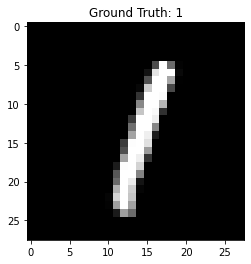

In [23]:
# Pick an image from the test images and show its label
plt.imshow(test_images[5,:,:], cmap='gray')
plt.title('Ground Truth: {}'.format(test_labels[5]))

In [24]:
# predict_classes method was not working so had to use the predict and argmax methods to get the model's prediction

# Send the corresponding image from the test dataset and have the model predict the resulting class
pred = model.predict(test_data[[5],:])
classes = np.argmax(pred, axis = 1)

# Show what the model predicted
print("The model identified the image to be a {}.".format(classes))

The model identified the image to be a [1].


Extra Credit

1) Change the loss method to sparce categorical cross entropy

In [25]:
# Initialize the model
model5 = Sequential()
model5.add(Dense(512, activation='relu', input_shape=(dimData,)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))

In [26]:
# Code in this segment is meant to see the error detected by the code when using the sparse categorical cross entropy method.

# Compile the model
model5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the data
history5 = model5.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/20


InvalidArgumentError: ignored

When fitting the model that was compiled using the sparse categorial cross entropy, we get an invalid argument error. This error appears because the one-hot encoding labels do not fit the criteria for the sparse categorical cross entropy where it is expecting integers and the one-hot encoding labels are floats.

To overcome this error, we used the test_train_split method to get our labels rather than using the to_categorical method. We also used a flatten layer for the input layer that used an input shape of 28 x 28 for the images. The process we used is shown below with the following model.

In [27]:
# Get the training and testing labels and images from the dataset
(train_images6, train_labels6), (test_images6, test_labels6) = mnist.load_data()

In [28]:
# Scale the values between 0 and 1
train_data6 = train_images6 / 255.0
test_data6 = test_images6 / 255.0

# data split
train_data6, test_data6, train_labels6, test_labels6 = train_test_split(train_data6, train_labels6, test_size=0.2, random_state=42)

In [29]:
# reshape data.
train_data6 = train_data6.reshape((train_data6.shape[0], 28,28,1))
test_data6 = test_data6.reshape((test_data6.shape[0], 28,28,1))

In [30]:
# Initialize the model
model6 = Sequential()
model6.add(keras.layers.Flatten(input_shape=(28, 28)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [31]:
# Compile the model
model6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the data
history6 = model6.fit(train_data6, train_labels6, batch_size=256, epochs=20, verbose=1)

Epoch 1/20
188/188 [==============================] - 5s 26ms/step - loss: 0.3063 - accuracy: 0.9068
Epoch 2/20
188/188 [==============================] - 5s 25ms/step - loss: 0.1062 - accuracy: 0.9669
Epoch 3/20
188/188 [==============================] - 5s 25ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 4/20
188/188 [==============================] - 5s 25ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 5/20
188/188 [==============================] - 5s 26ms/step - loss: 0.0310 - accuracy: 0.9899
Epoch 6/20
188/188 [==============================] - 5s 25ms/step - loss: 0.0239 - accuracy: 0.9919
Epoch 7/20
188/188 [==============================] - 5s 26ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 8/20
188/188 [==============================] - 5s 25ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 9/20
188/188 [==============================] - 5s 25ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 10/20
188/188 [==============================] - 5s 26ms/step - loss: 0.0096 - accura

In [32]:
# Evaluate the model to find the loss and accuracy
[test_loss6, test_acc6] = model6.evaluate(test_data6, test_labels6)

print("Evaluation result on Test Data: Loss = {}, Accuracy = {}".format(test_loss6, test_acc6))

375/375 [==============================] - 2s 4ms/step - loss: 0.1520 - accuracy: 0.9806
Evaluation result on Test Data: Loss = 0.15199847519397736, Accuracy = 0.9805833101272583


2) Use a method from NumPy to print the correct class from the model prediction

To print the correct class from the model's prediction, we have to use the Numpy's argmax method. As we have shown in problem 5 in the ICP, the predication of the model is sent to the argmax method to identify the maximum value of the prediction array, which identifies the class the model believes the image is depicting. The code below helps demonstrate a couple instances of how the agrmax method is used to help identify the correct class of the model's prediction.

Text(0.5, 1.0, 'Ground Truth: 1')

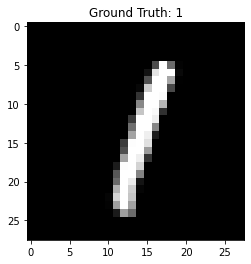

In [33]:
# Pick an image from the test images and show its label
plt.imshow(test_images[5,:,:], cmap='gray')
plt.title('Ground Truth: {}'.format(test_labels[5]))

In [34]:
# Send the corresponding image from the test dataset and have the model predict the resulting class
pred = model.predict(test_data[[5],:])
classes = np.argmax(pred, axis = 1)

# Show what the model predicted
print("The model identified the image to be a {}.".format(classes))

The model identified the image to be a [1].


Text(0.5, 1.0, 'Ground Truth: 2')

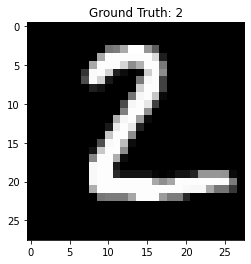

In [35]:
# Pick an image from the test images and show its label
plt.imshow(test_images[1,:,:], cmap='gray')
plt.title('Ground Truth: {}'.format(test_labels[1]))

In [36]:
# Send the corresponding image from the test dataset and have the model predict the resulting class
pred = model.predict(test_data[[1],:])
classes = np.argmax(pred, axis = 1)

# Show what the model predicted
print("The model identified the image to be a {}.".format(classes))

The model identified the image to be a [2].


Text(0.5, 1.0, 'Ground Truth: 0')

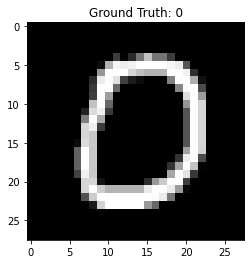

In [37]:
# Pick an image from the test images and show its label
plt.imshow(test_images[10,:,:], cmap='gray')
plt.title('Ground Truth: {}'.format(test_labels[10]))

In [38]:
# Send the corresponding image from the test dataset and have the model predict the resulting class
pred = model.predict(test_data[[10],:])
classes = np.argmax(pred, axis = 1)

# Show what the model predicted
print("The model identified the image to be a {}.".format(classes))

The model identified the image to be a [0].
